In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/techcorner-mobile-purchase-and-engagement-data/TechCorner_Sales_update.csv


In [2]:
data = pd.read_csv('/kaggle/input/techcorner-mobile-purchase-and-engagement-data/TechCorner_Sales_update.csv')

In [3]:
data.head()

,Cus.ID,Date,Cus. Location,Age,Gender,Mobile Name,Sell Price,Does he/she Come from Facebook Page?,Does he/she Followed Our Page?,Did he/she buy any mobile before?,Did he/she hear of our shop before?
0,1,27-05-2024,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2,27-05-2024,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,3,27-05-2024,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,4,27-05-2024,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,5,27-05-2024,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


In [4]:
print("\nDataset structure:")
print(data.info())



Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Cus.ID                                8871 non-null   int64  
 1   Date                                  8871 non-null   object 
 2   Cus. Location                         8871 non-null   object 
 3   Age                                   8871 non-null   int64  
 4   Gender                                8871 non-null   object 
 5   Mobile Name                           8871 non-null   object 
 6   Sell Price                            8871 non-null   float64
 7   Does he/she Come from Facebook Page?  8871 non-null   object 
 8   Does he/she Followed Our Page?        8871 non-null   object 
 9   Did he/she buy any mobile before?     8871 non-null   object 
 10  Did he/she hear of our shop before?   8871 non-null   object 
dt

In [5]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Cus.ID                                  0
Date                                    0
Cus. Location                           0
Age                                     0
Gender                                  0
Mobile Name                             0
Sell Price                              0
Does he/she Come from Facebook Page?    0
Does he/she Followed Our Page?          0
Did he/she buy any mobile before?       0
Did he/she hear of our shop before?     0
dtype: int64


In [6]:
print("\nSummary statistics for numerical columns:")
print(data[['Age', 'Sell Price']].describe())


Summary statistics for numerical columns:
               Age    Sell Price
count  8871.000000    8871.00000
mean     34.047007   25068.38654
std       9.592612   18032.80271
min      18.000000   12702.00000
25%      26.000000   17466.50000
50%      34.000000   21682.00000
75%      42.000000   25777.50000
max      50.000000  200465.00000


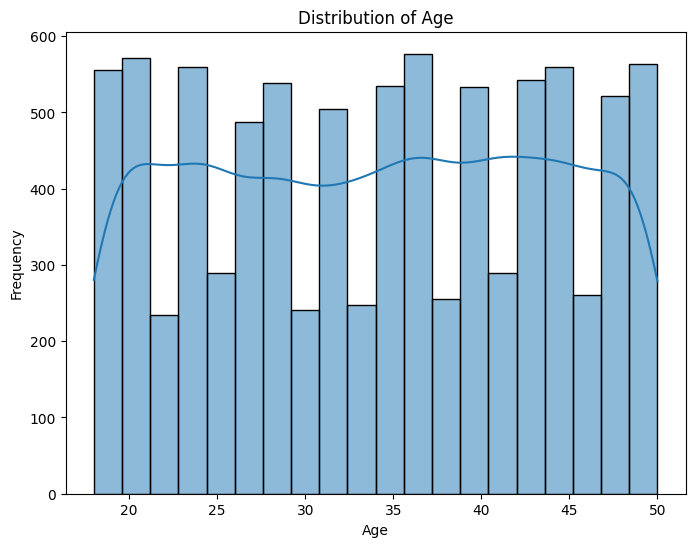

In [7]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

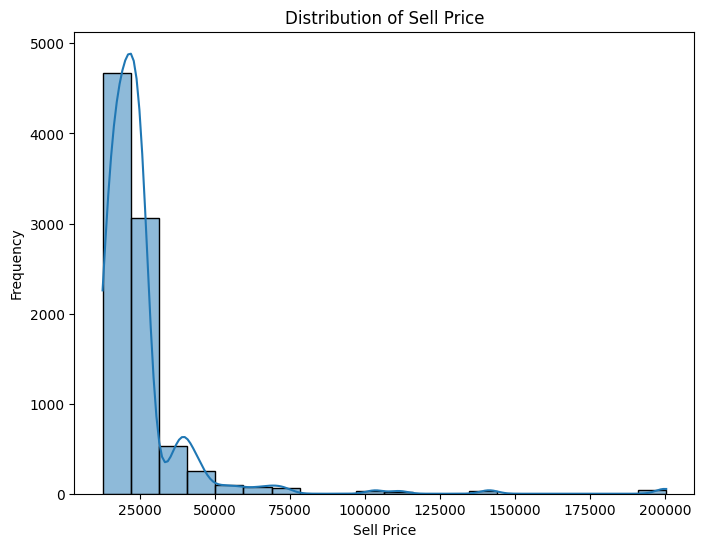

In [8]:
plt.figure(figsize=(8, 6))  # Create a figure
sns.histplot(data['Sell Price'], bins=20, kde=True)  # Plot histogram
plt.title('Distribution of Sell Price')  # Add title
plt.xlabel('Sell Price')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.show()  # Show the plot

In [9]:
categorical_features = ['Cus. Location', 'Gender', 'Mobile Name', 'Does he/she Come from Facebook Page?', 
                        'Does he/she Followed Our Page?', 'Did he/she buy any mobile before?', 
                        'Did he/she hear of our shop before?']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop(columns=['Cus.ID', 'Date', 'Sell Price'])  # Drop non-relevant columns
y = data_encoded['Sell Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Machine Learning: Build and Evaluate Models
# ==================================================
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    r2 = r2_score(y_test, y_pred)  # Calculate R-squared
    return mse, r2# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [10]:
# Evaluate Linear Regression
linear_mse, linear_r2 = evaluate_model(linear_model, X_train, X_test, y_train, y_test)
print("\nLinear Regression:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R-squared: {linear_r2}")


Linear Regression:
Mean Squared Error: 258838637.616707
R-squared: 0.09807606037594774


In [11]:
# Evaluate Random Forest
rf_mse, rf_r2 = evaluate_model(rf_model, X_train, X_test, y_train, y_test)
print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")


Random Forest Regressor:
Mean Squared Error: 337973067.73663473
R-squared: -0.17766807748093694


In [12]:
# Evaluate Gradient Boosting
gb_mse, gb_r2 = evaluate_model(gb_model, X_train, X_test, y_train, y_test)
print("\nGradient Boosting Regressor:")
print(f"Mean Squared Error: {gb_mse}")
print(f"R-squared: {gb_r2}")


Gradient Boosting Regressor:
Mean Squared Error: 267947276.03495172
R-squared: 0.06633698493327889
